In [25]:

import pandas as pd
from matplotlib import pyplot as plt
cs_staff   = pd.read_csv('cs_staff.csv')
cs_staff.columns = [x.strip() for x in cs_staff.columns]
cs = cs_staff[['Year', 'black_pct', 'hispanic_pct', 'women_pct']]


cs.set_index('Year', inplace=True)
cs = cs.apply(lambda col: col.apply(lambda x: float(x[:-1]))/100)
cs.reset_index(inplace=True)

ipeds = pd.read_csv('all_student_inst.csv', index_col=0)
taul = pd.read_csv('ipeds_and_taulb.csv')
taul
new = pd.merge(taul, ipeds, on='Unit Id') 
stud = new.dropna()

stud_set = stud.groupby('Year')[[ 'grand_total','black_total','hispanic_total','women_total', 'total_cs','black_cs','hispanic_cs','women_cs', ]].mean()
stud_set['black_cs']           = stud_set['black_cs']/(stud_set['total_cs'])
stud_set['hispanic_cs']        = stud_set['hispanic_cs']/stud_set['total_cs']
stud_set['women_cs']           = stud_set['women_cs']/stud_set['total_cs']
stud_set['black_noncs']        = (stud_set['black_total']-stud_set['black_cs'])/stud_set['grand_total']
stud_set['hispanic_noncs']     = (stud_set['hispanic_total']-stud_set['hispanic_cs'])/stud_set['grand_total']
stud_set['women_noncs']        = (stud_set['women_total']-stud_set['women_cs'])/stud_set['grand_total']
stud_set= stud_set.reset_index()
merged = pd.merge(cs, stud_set, on='Year')
merged


,Year,black_pct,hispanic_pct,women_pct,grand_total,black_total,hispanic_total,women_total,total_cs,black_cs,hispanic_cs,women_cs,black_noncs,hispanic_noncs,women_noncs
0,2002,0.010,0.017,0.138,2971.982456,188.479532,174.526316,1599.023392,113.614035,0.054149,0.036905,0.224161,0.063401,0.058711,0.537957
1,2003,0.009,0.017,0.140,2822.385965,175.684211,162.128655,1519.789474,96.684211,0.053408,0.037682,0.227242,0.062228,0.057430,0.538396
2,2004,0.011,0.020,0.144,3147.063953,201.302326,196.750000,1684.720930,103.500000,0.062016,0.040164,0.184417,0.063945,0.062506,0.535272
3,2005,0.011,0.017,0.149,3052.255814,195.750000,183.034884,1641.988372,114.000000,0.059517,0.037638,0.210118,0.064113,0.059955,0.537890
4,2006,0.013,0.017,0.154,3210.563953,206.453488,206.674419,1723.697674,86.174419,0.059236,0.048104,0.162259,0.064286,0.064358,0.536833
5,2007,0.012,0.018,0.158,3272.546512,211.313953,218.691860,1753.581395,73.802326,0.061525,0.046164,0.152671,0.064553,0.066812,0.535799
6,2008,0.013,0.017,0.166,3498.906433,230.040936,268.239766,1855.801170,71.111111,0.065625,0.054688,0.147615,0.065728,0.076648,0.530352
7,2009,0.013,0.023,0.170,3374.110465,220.127907,242.773256,1798.558140,67.430233,0.062683,0.052940,0.146577,0.065222,0.071936,0.533003
8,2010,0.013,0.021,0.176,3310.895954,213.445087,230.468208,1766.427746,67.092486,0.065564,0.053158,0.145171,0.064448,0.069593,0.533476
9,2011,0.014,0.023,0.190,4102.028571,274.000000,479.794286,2183.154286,180.211429,0.054793,0.083140,0.199797,0.066783,0.116945,0.532165


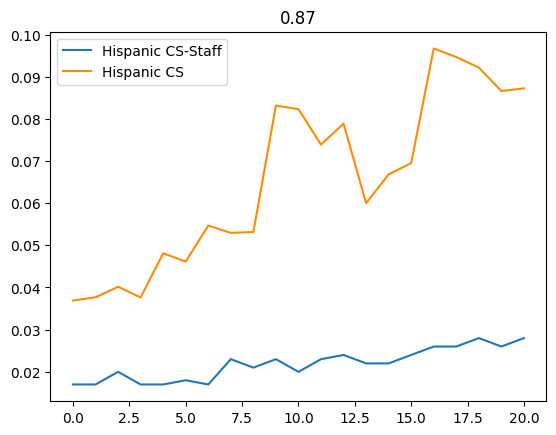

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
plt.plot(merged.index, merged['hispanic_pct'],label="Hispanic CS-Staff")
# plt.twinx()
plt.plot(merged.index, merged['hispanic_cs'],label="Hispanic CS",color='darkorange')
plt.title('Hispanic\nOrange: Student, Blue: Staff')
# plt.legend(['A', 'B'])
from scipy.stats import pearsonr
plt.title(round(pearsonr(merged['hispanic_pct'], merged['hispanic_cs'])[0], 2))
plt.legend()

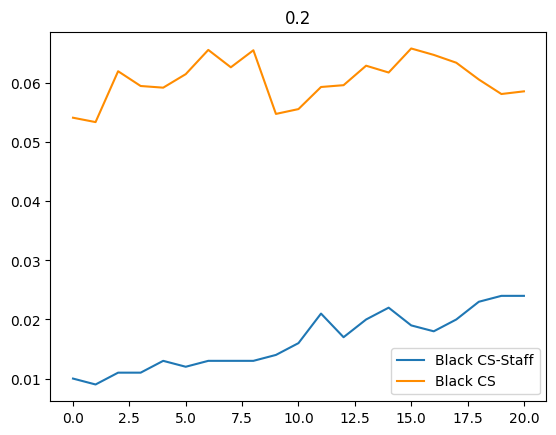

In [27]:
import pandas as pd
from matplotlib import pyplot as plt

plt.plot(merged.index, merged['black_pct'],label="Black CS-Staff")
# plt.twinx()
plt.plot(merged.index, merged['black_cs'],label="Black CS",color='darkorange')

from scipy.stats import pearsonr
plt.title(round(pearsonr(merged['black_pct'], merged['black_cs'])[0], 2))


plt.legend()


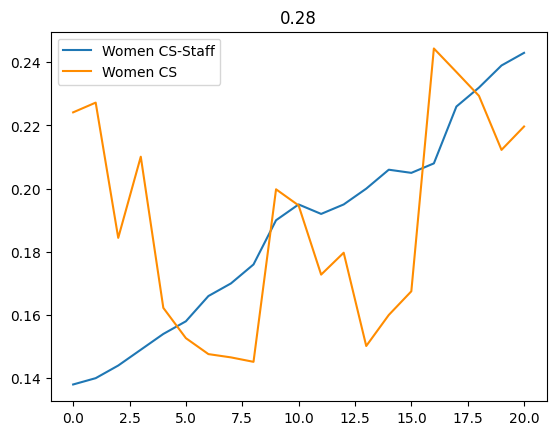

In [28]:
import pandas as pd
from matplotlib import pyplot as plt

plt.plot(merged.index, merged['women_pct'],label="Women CS-Staff")
# plt.twinx()
plt.plot(merged.index, merged['women_cs'],label="Women CS",color='darkorange')

plt.title(round(pearsonr(merged['women_pct'], merged['women_cs'])[0], 2))


plt.legend()

